This notebook regroups all the tests done during the master thesis that have not been used in practice or that where informative tests

## Influence of the deformability parameter

The deformability parameter can be used to see how the gravitational effect of one object can act on the other to deform it. It changes the gravitational wave form. Here, we look at the difference with and without. The goal was to have an idea of what it would do. It is done for neutron star models.

In [2]:
#3 waveforms with different deformablity parameters (lambda 1 and lambda 2)

from pycbc.waveform import get_td_waveform

hp1, hf1 = get_td_waveform(approximant = "TaylorF2", mass1 = 1., 
                           mass2 = 1., lambda1 = 0., lambda2 = 0., 
                           delta_t = 1./2048., f_lower = 15.)

hp2, hf2 = get_td_waveform(approximant = "TaylorF2", mass1 = 1., 
                           mass2 = 1., lambda1 = 800 , lambda2 = 1400, 
                           delta_t = 1./2048., f_lower = 15.)

hp3, hf3 = get_td_waveform(approximant = "TaylorF2", mass1 = 1., 
                           mass2 = 1., lambda1 = 0., lambda2 = 1400, 
                           delta_t = 1./2048., f_lower = 15.)

/home/justin/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


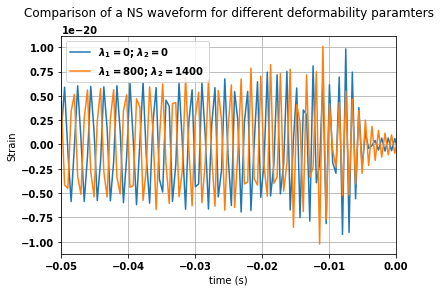

In [3]:
#plot of 2 of them to compare
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(hp1.sample_times, hp1, label = '$\lambda_1 = 0$; $\lambda_2 = 0$')
plt.plot(hp2.sample_times, hp2, label = '$\lambda_1 = 800$; $\lambda_2 = 1400$')
#plt.plot(hp3.sample_times, hp3, label = '$\lambda_1 = 0$; $\lambda_2 = 1400$')
plt.title("Comparison of a NS waveform for different deformability paramters", 
          pad = 20)
plt.legend(loc = 'best')
plt.xlabel("time (s)")
plt.ylabel("Strain")
plt.xlim(-0.05, 0)
plt.grid()


## Comparison between a black hole and a neutron star merger

We look at the difference in duration and amplitude between a BBH and  BNS merger. This is useful to undertand why the analysis is more difficult and heavier for the BNS. It is also useful in order to understand how a BBH can influnce in the detection of a BNS, in the case where the black holes overlap.

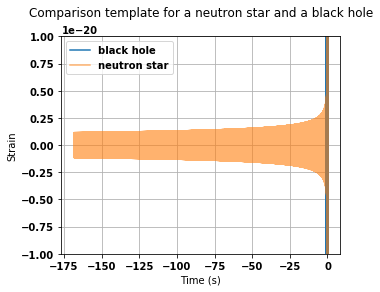

In [4]:
from pycbc.waveform import get_td_waveform

plt.figure(figsize = [5,4])

hpBH, _ = get_td_waveform(approximant="SEOBNRv4",
                         mass1=30.5, mass2=25.3, delta_t = 1./4096, f_lower = 20.)
hpNS, _ = get_td_waveform(approximant = "TaylorT4", mass1 = 1.46,
                                mass2 = 1.27, f_lower = 20.,
                                delta_t = 1./4096)

plt.plot(hpBH.sample_times, hpBH, label = 'black hole')
plt.plot(hpNS.sample_times, hpNS, alpha = 0.6, label = 'neutron star')
plt.grid()
plt.title("Comparison template for a neutron star and a black hole", pad = 20)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.ylim(-1e-20, 1e-20)
plt.legend(loc='best')

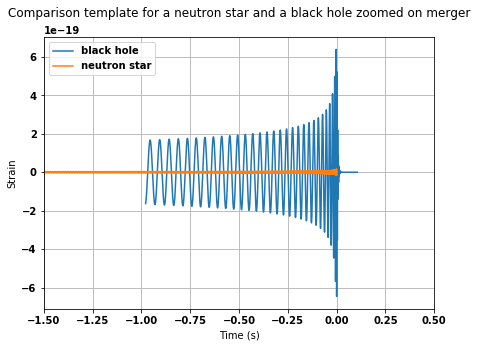

In [5]:
plt.figure(figsize = [7,5])
plt.plot(hpBH.sample_times, hpBH, label = 'black hole')
plt.plot(hpNS.sample_times, hpNS, label = 'neutron star')
plt.grid()
plt.title("Comparison template for a neutron star and a black hole zoomed on merger", pad = 20)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.xlim(-1.5,0.5)
plt.legend(loc='best')

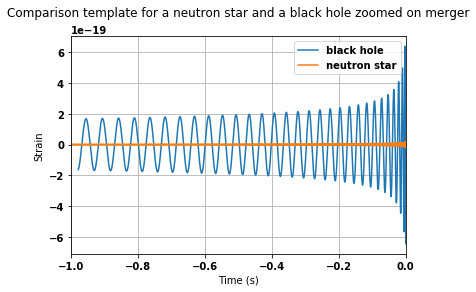

In [6]:
plt.plot(hpBH.sample_times, hpBH, label = 'black hole')
plt.plot(hpNS.sample_times, hpNS, label = 'neutron star')
plt.grid()
plt.title("Comparison template for a neutron star and a black hole zoomed on merger", pad = 20)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.xlim(-1, 0)
plt.legend(loc='best')

## Influence of a mass difference in the case of BNS

Vizualisation of the shift that can happen in a neutron star merger for a very small mass difference (0.01 M_0). This is imoprtant to understand why it can be difficult to work in the time domain for a BNS, as this shift becomes more and more important as time goes on. 

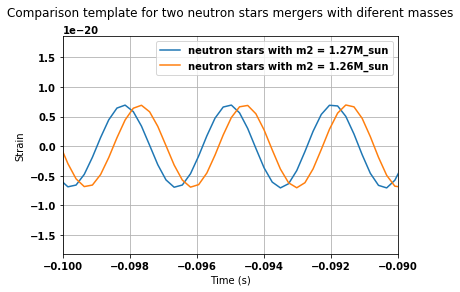

In [7]:
hpNS, _ = get_td_waveform(approximant = "TaylorT4", mass1 = 1.46,
                                mass2 = 1.27, f_lower = 20.,
                                delta_t = 1./4096)
hpNS2, _ = get_td_waveform(approximant = "TaylorT4", mass1 = 1.46,
                                mass2 = 1.26, f_lower = 20.,
                                delta_t = 1./4096)

plt.plot(hpNS.sample_times, hpNS, label = 'neutron stars with m2 = 1.27M_sun')
plt.plot(hpNS2.sample_times, hpNS2, label = 'neutron stars with m2 = 1.26M_sun')
plt.grid()
plt.xlim(-0.1,-0.09)
plt.title("Comparison template for two neutron stars mergers with diferent masses", pad = 20)
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend(loc='best')

## Comparison between the plus and cross polarization

We look at the difference between the two polarizations that exist between the two detectors

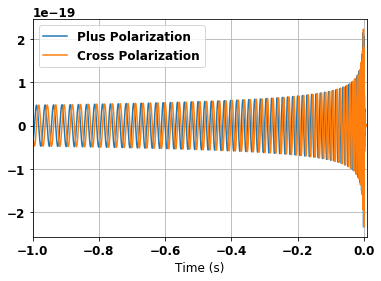

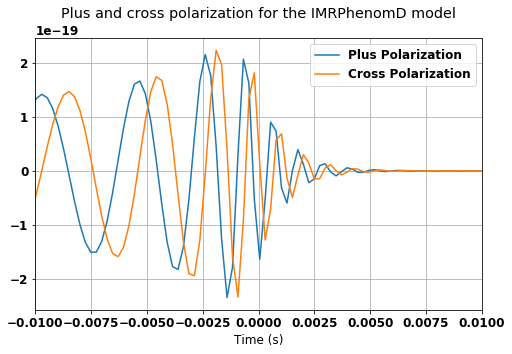

In [8]:
#first we need to set bigger characters for the titles, labels and thicks.
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
from pycbc.waveform import get_td_waveform

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="IMRPhenomD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-1.0,0.01)
plt.legend()
plt.grid()
plt.show()

# Zoom in near the merger time#
plt.figure(figsize=[8,5])
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-.01, .01)
plt.legend()
plt.grid()
plt.title("Plus and cross polarization for the IMRPhenomD model", pad=20)
plt.show()

## Influence of the masses and spins on the waveforl

We look at how the template changes depending in the masses and spins used for the model. This enables to understand the importance of these parameters.

Text(0.5,1,'Influence of the mass on the waveform for one fixed mass and on having a varying value')

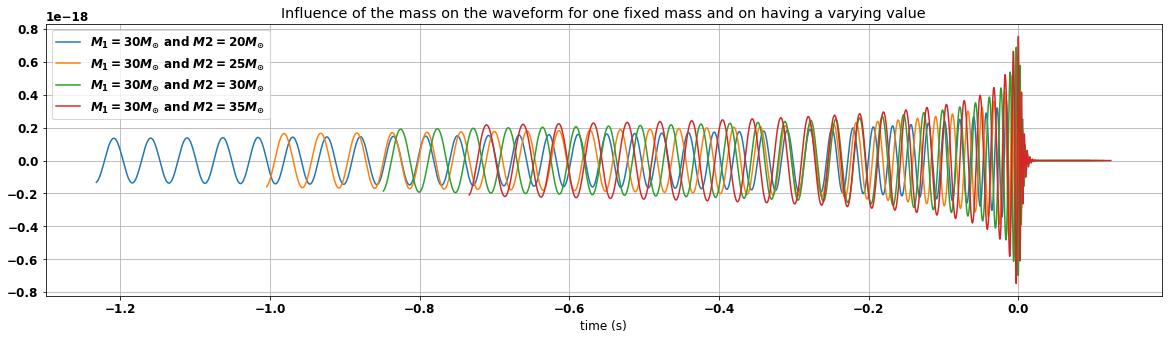

In [9]:
from pycbc.waveform import get_td_waveform

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
for m2 in [20,25,30,35]:
    hp, hc= get_td_waveform(approximant="SEOBNRv4_opt", mass1=30, mass2=m2, delta_t=1.0/4096, f_lower=20.0)
    plt.plot(hp.sample_times, hp, label="$M_{1}=30 M_{\odot}$ and $M2= %i M_{\odot}$" %m2)
plt.legend(loc="best")
plt.grid()
plt.xlabel("time (s)")
plt.title("Influence of the mass on the waveform for one fixed mass and on having a varying value")

Text(0.5,1,'Influence of the mass on the waveform for one fixed mass and on having a varying value')

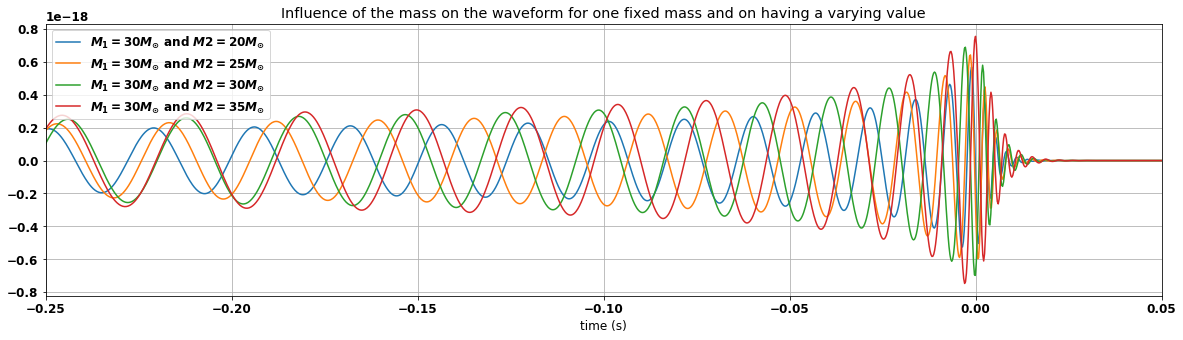

In [10]:
#zoom on the messy part
plt.figure(figsize=(20,5))
for m2 in [20,25,30,35]:
    hp, hc= get_td_waveform(approximant="SEOBNRv4_opt", mass1=30, mass2=m2, delta_t=1.0/4096, f_lower=20.0)
    plt.plot(hp.sample_times, hp, label="$M_{1}=30 M_{\odot}$ and $M2= %i M_{\odot}$" %m2)
plt.legend(loc="best")
plt.grid()
plt.xlabel("time (s)")
plt.xlim(-0.25,0.05)
plt.title("Influence of the mass on the waveform for one fixed mass and on having a varying value")

Text(0.5,1,'Influence of the spin along the z-axis for one black hole')

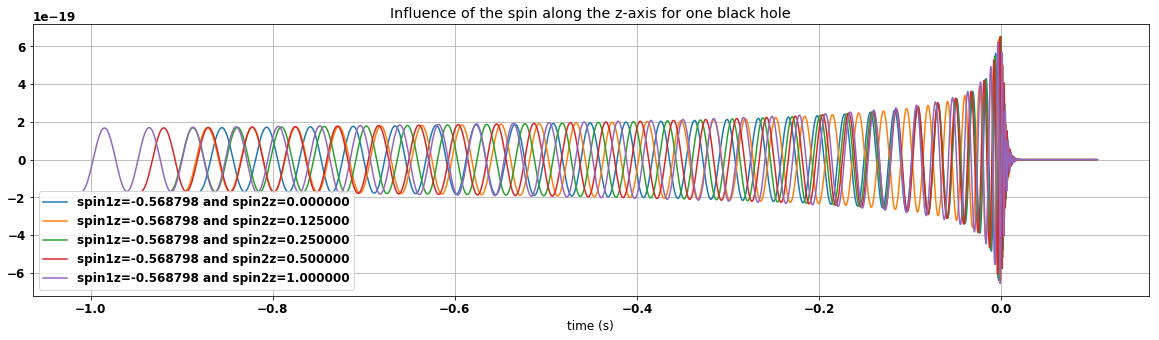

In [12]:
import numpy as np
plt.figure(figsize=(20,5))
m1=31.
m2=25.
spin1z=-0.56879753
dist=540.

for spin2z in [0, 0.125,0.25, 0.5, 1 ]:
    hp, hc= get_td_waveform(approximant="SEOBNRv4_opt", mass1=m1, mass2=m2,spin1z=spin1z, spin2z=spin2z, dist=dist, delta_t=1.0/4096, f_lower=20.0)
    plt.plot(hp.sample_times, hp, label="spin1z=%f and spin2z=%f" %(spin1z, spin2z))
plt.legend(loc="best")
plt.grid()
plt.xlabel("time (s)")
plt.title("Influence of the spin along the z-axis for one black hole")

Text(0.5,1,'Influence of the spin along the z-axis for one black hole')

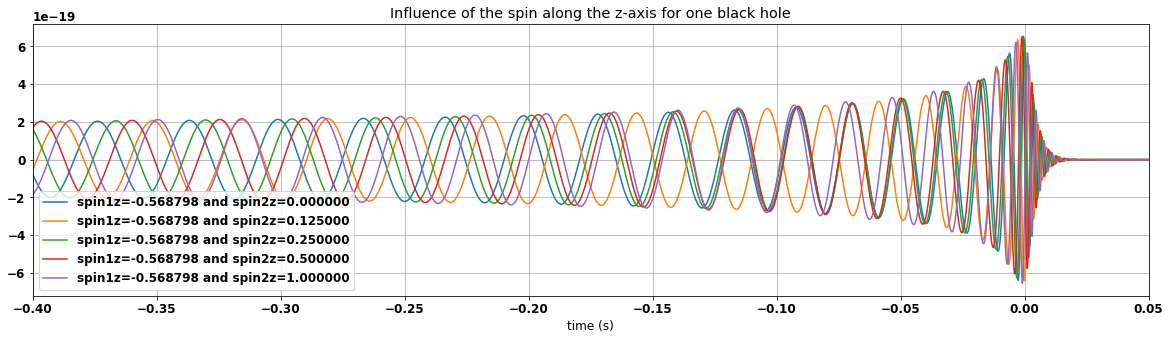

In [13]:
#zoom of the plot above
plt.figure(figsize=(20,5))
m1=31.
m2=25.
spin1z=-0.56879753
dist=540.

for spin2z in [0, 0.125,0.25, 0.5, 1 ]:
    hp, hc= get_td_waveform(approximant="SEOBNRv4_opt", mass1=m1, mass2=m2,spin1z=spin1z, spin2z=spin2z, dist=dist, delta_t=1.0/4096, f_lower=20.0)
    plt.plot(hp.sample_times, hp, label="spin1z=%f and spin2z=%f" %(spin1z, spin2z))
plt.legend(loc="best")
plt.grid()
plt.xlim(-0.4,0.05)
plt.xlabel("time (s)")
plt.title("Influence of the spin along the z-axis for one black hole")